# Imports e dependências

In [129]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.tree import DecisionTreeClassifier

import pickle

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix

from sklearn import tree

from collections import Counter
import math

# Carregamento de dados

In [130]:
# Abrir dados formatados de arquivo e transferir para variáveis
with open('Dados/Titanic.pkl', 'rb') as f:
    x_treino, x_teste, y_treino, y_teste = pickle.load(f)

#  Criar árvore com base de dados

In [ ]:

# Definir especificações de montagem da árvore
# - Critério: Entropia
# - Altura máxima: 10
# - Mínimo de 7.5% da amostragem deve estar presente em uma folha
modelo = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=0.075)

Y = modelo.fit(x_treino, y_treino)


# Testar modelo

### Testar árvore

In [132]:
previsoes = modelo.predict(x_teste)

### Obter acurácia do teste

In [133]:
accuracy_score(y_teste, previsoes)

0.8100558659217877

### Matriz de confusão

In [134]:
confusion_matrix(y_teste, previsoes)

array([[98,  7],
       [27, 47]])

c:\Linguagens\Python\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8100558659217877

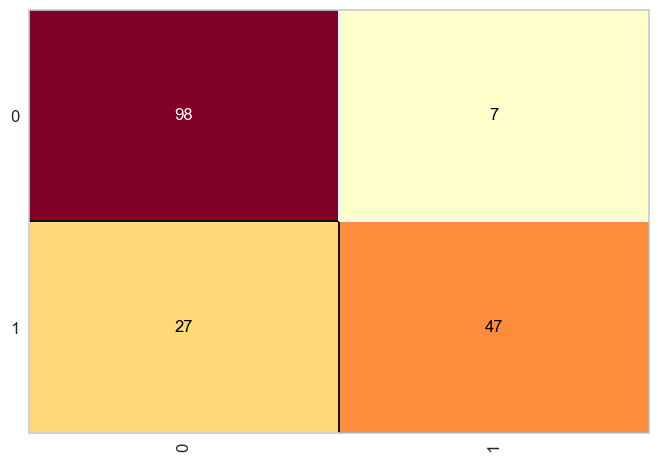

In [135]:
cm = ConfusionMatrix(modelo)
cm.fit(x_treino, y_treino)
cm.score(x_teste, y_teste)

In [136]:

print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

           0       0.78      0.93      0.85       105
           1       0.87      0.64      0.73        74

    accuracy                           0.81       179
   macro avg       0.83      0.78      0.79       179
weighted avg       0.82      0.81      0.80       179



# Resultado

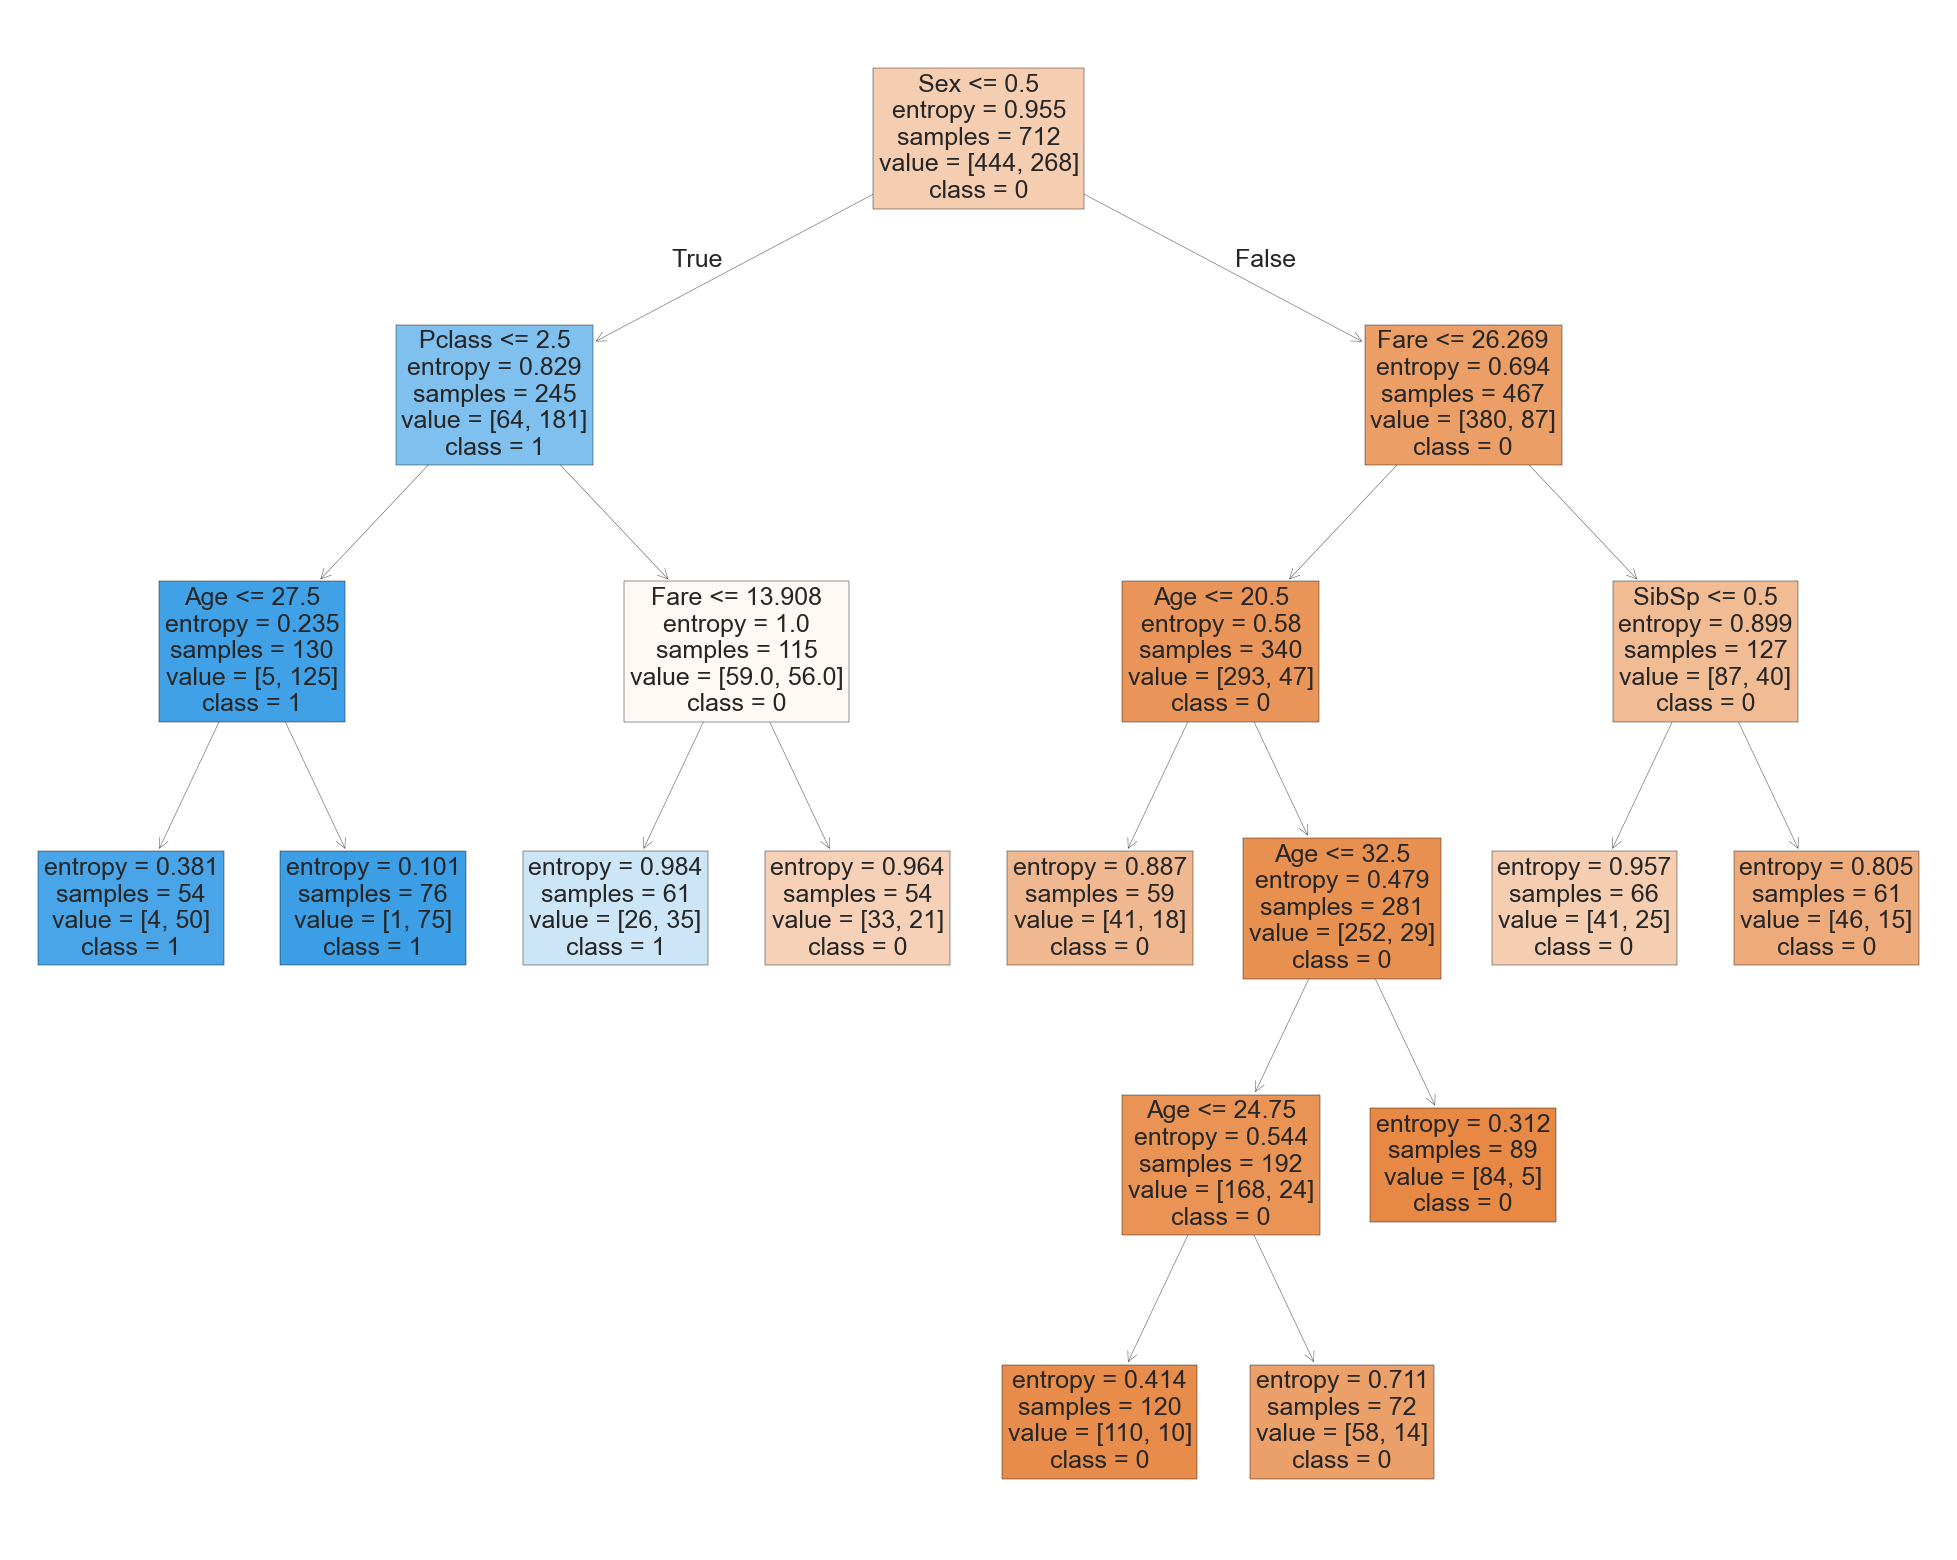

In [138]:
previsores = x_treino.columns
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(25,20))
tree.plot_tree(modelo, feature_names=previsores, class_names = modelo.classes_, filled=True, fontsize=18);